In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

from backtest import backtest_dca

In [2]:
df_origin = pd.read_csv("prices.csv", index_col=0, parse_dates=True)
df_origin

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


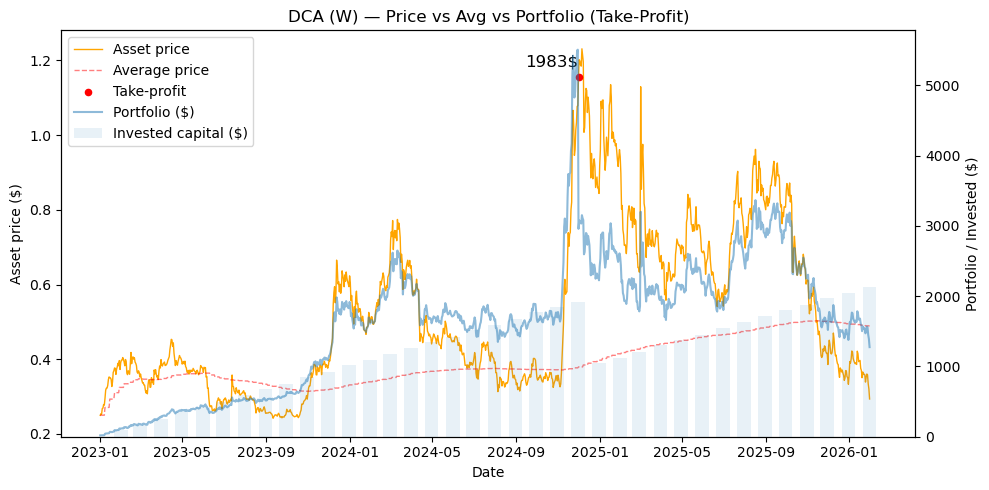

In [3]:
sol_prices = df_origin["ADA"]
invest_sum = 3000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [4]:
metric

{'Cash_spent': 3096,
 'Final_portfolio_value': 1274,
 'Realized_profit': 1983,
 'Total_equity': 3257,
 'Num_take_profits': 1}

In [5]:
res

,Portfolio,Invested,Avg_price,Realized_profit
2023-01-01,19.211538,19.230769,0.250021,0.000000
2023-01-02,19.523588,19.230769,0.250021,0.000000
2023-01-03,19.444211,19.230769,0.250021,0.000000
2023-01-04,20.588808,19.230769,0.250021,0.000000
2023-01-05,20.698414,19.230769,0.250021,0.000000
...,...,...,...,...
2026-01-27,1564.906258,2125.000000,0.489260,1983.293584
2026-01-28,1554.373834,2125.000000,0.489260,1983.293584
2026-01-29,1450.703711,2125.000000,0.489260,1983.293584
2026-01-30,1391.395999,2125.000000,0.489260,1983.293584


# всі монети

In [6]:
# df = df_origin[:"2025-09-01"].copy()
df = df_origin.copy()
# df = df[['ETH', 'BNB', 'SOL', 'LINK', 'LTC', 'AVAX', 'DOT']]
# df = df.loc["2025-06-01 00:00:00":]

df

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX,DOT,LTC
Date,,,,,,,,,,,,
2023-01-01,16625.080078,1200.964844,244.136978,0.338763,9.982173,0.054820,0.249771,148.576935,5.622443,10.865915,4.370816,70.815659
2023-01-02,16688.470703,1214.656616,245.535904,0.348556,11.272967,0.055157,0.253828,147.943558,5.687627,11.153615,4.489374,74.862907
2023-01-03,16679.857422,1214.778809,246.133362,0.343824,13.344046,0.054833,0.252796,148.487930,5.622096,11.384450,4.524364,75.602722
2023-01-04,16863.238281,1256.526611,259.119690,0.347794,13.435113,0.054732,0.267677,150.743652,5.804032,12.077613,4.630191,75.433907
2023-01-05,16836.736328,1250.438599,256.422852,0.338039,13.419330,0.053661,0.269102,155.921738,5.647835,11.740196,4.617662,74.250809
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-27,89102.570312,3022.210938,897.665527,1.913935,127.054794,0.294245,0.360304,469.657715,12.035913,12.118824,1.874989,69.964523
2026-01-28,89184.570312,3006.607422,901.348877,1.908726,125.118446,0.294984,0.357879,468.625854,11.832648,12.058091,1.867865,69.383377
2026-01-29,84561.585938,2818.232666,867.098145,1.805065,117.605766,0.294531,0.334010,459.148529,11.098450,11.025457,1.732650,66.103889


========== BTC ==========


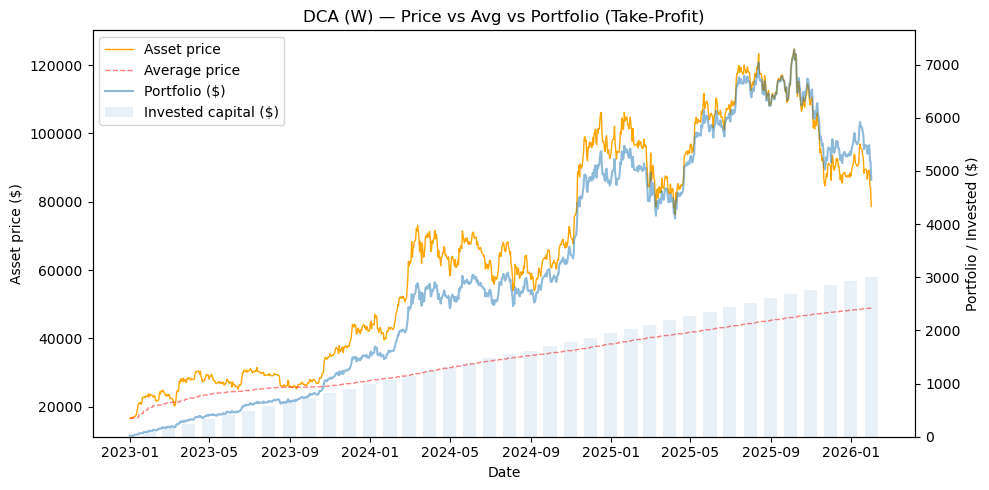

========== ETH ==========


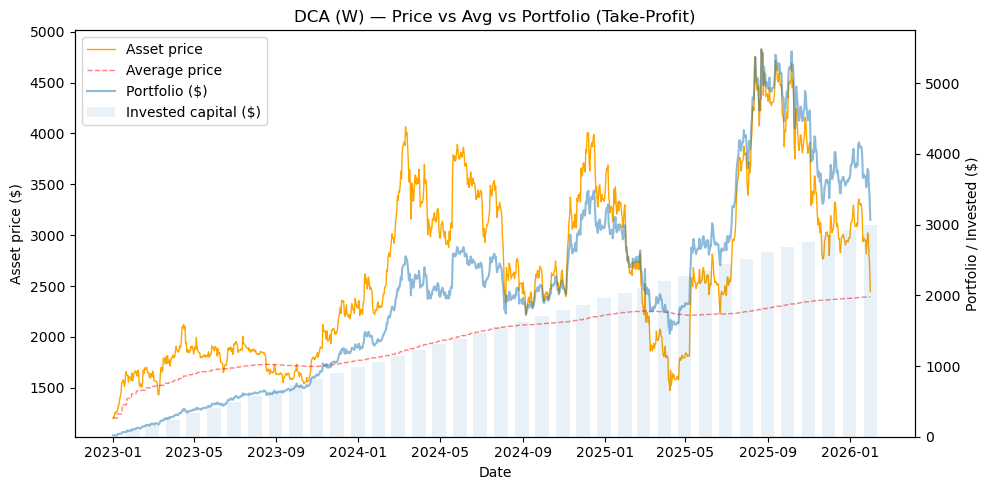

========== BNB ==========


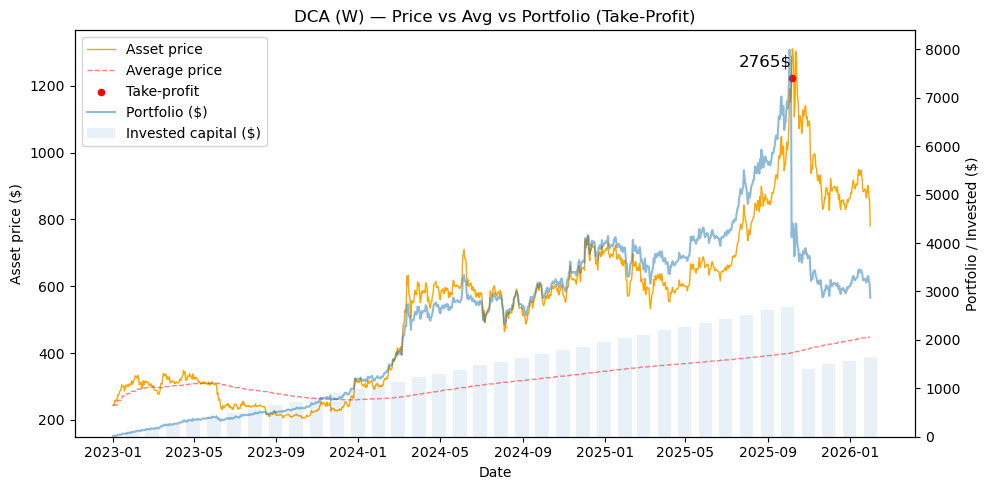

========== XRP ==========


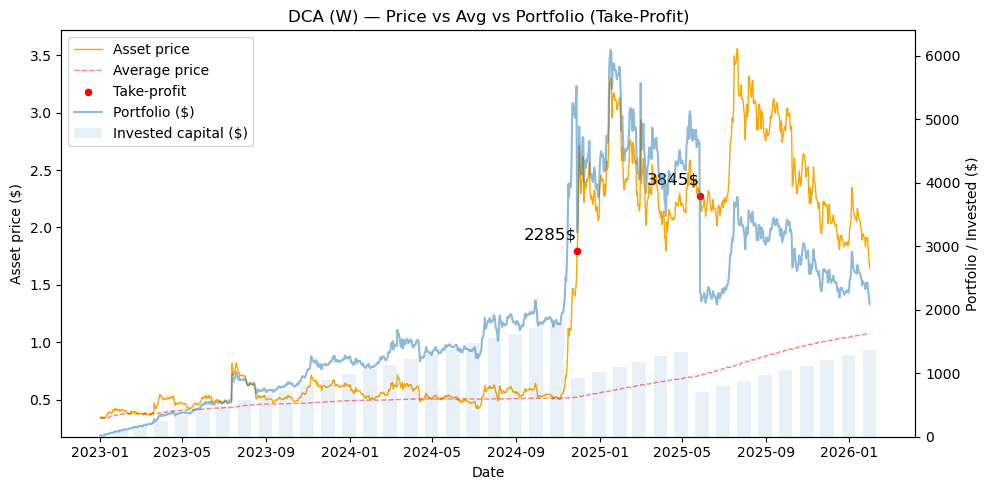

========== SOL ==========


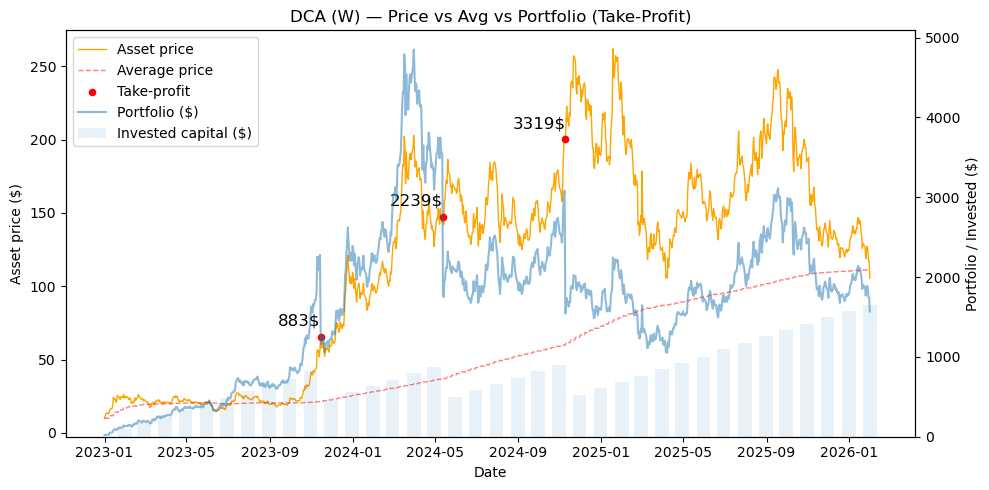

========== TRON ==========


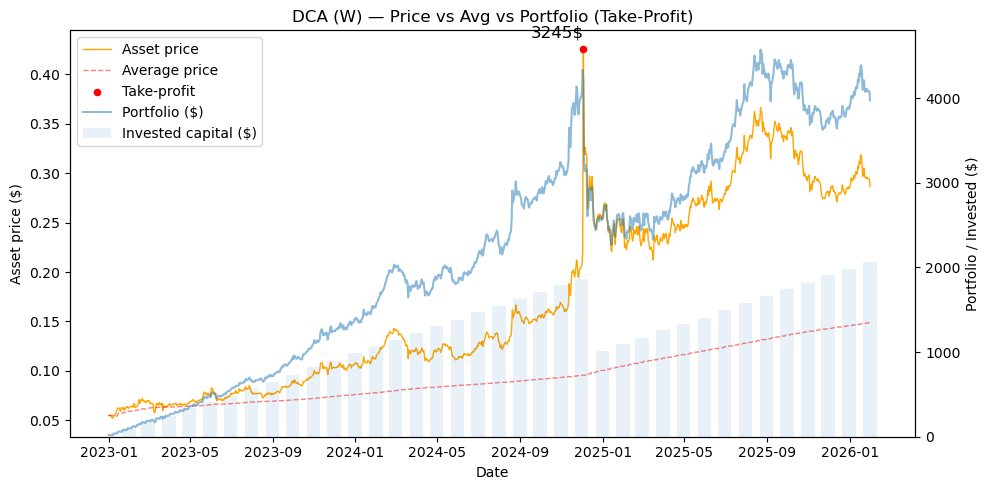

========== ADA ==========


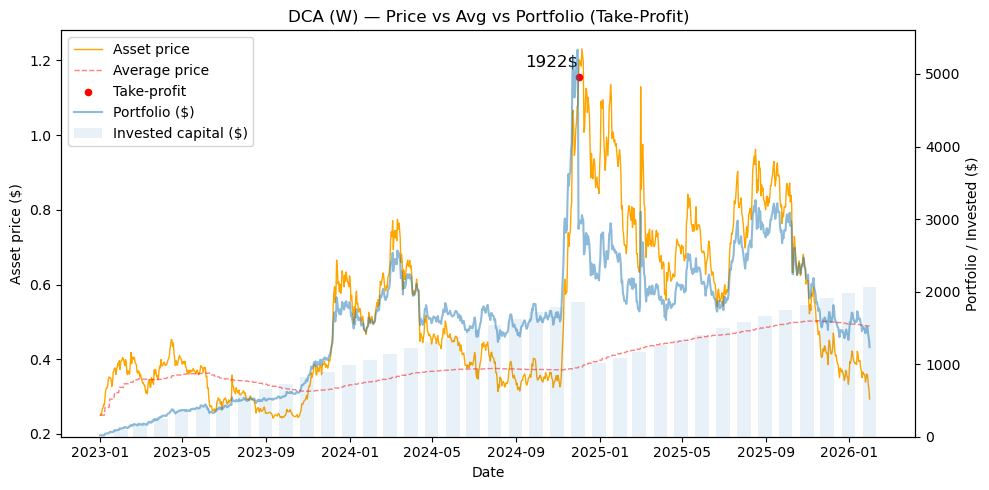

========== XMR ==========


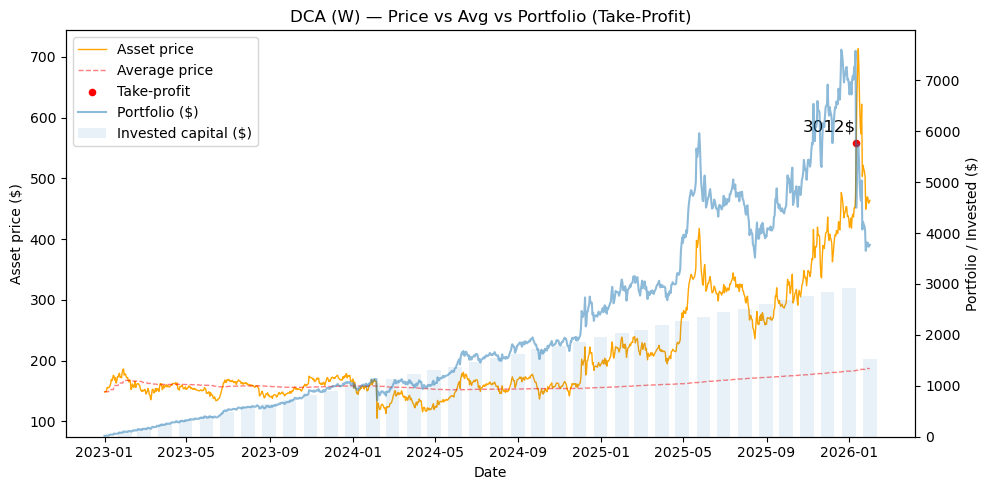

========== LINK ==========


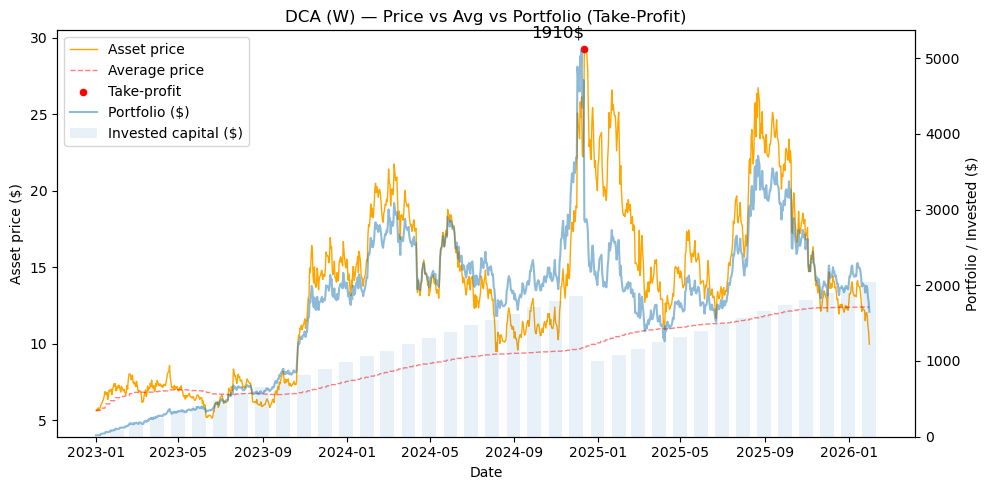

========== AVAX ==========


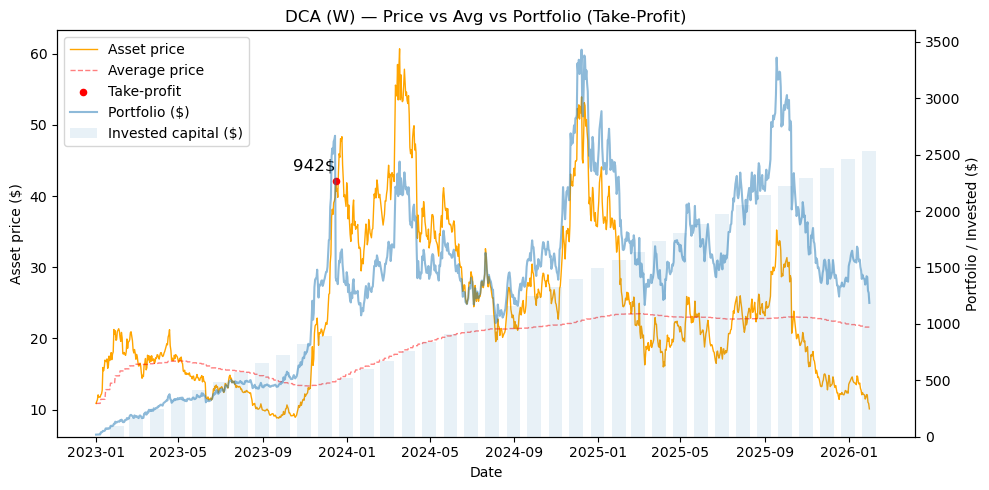

In [7]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 30_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    print("=" * 10, symbol, "=" * 10)
    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W",
        available_sum=1_000_000,
        fee=0.001,
        cooldown_days=180,
        profit_multiple=3,
        plot=True
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [8]:
results = pd.DataFrame(res).T

In [9]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_equity,Num_take_profits
TRON,2999,3971,3244,7215,1
XMR,2999,3769,3011,6780,1
XRP,2999,2087,3844,5931,2
BNB,2999,2874,2765,5639,1
SOL,2999,1568,3319,4887,3
BTC,2999,4832,0,4832,0
LINK,2999,1649,1909,3558,1
ADA,2999,1235,1921,3156,1
ETH,2999,3065,0,3065,0
AVAX,2999,1185,942,2127,1


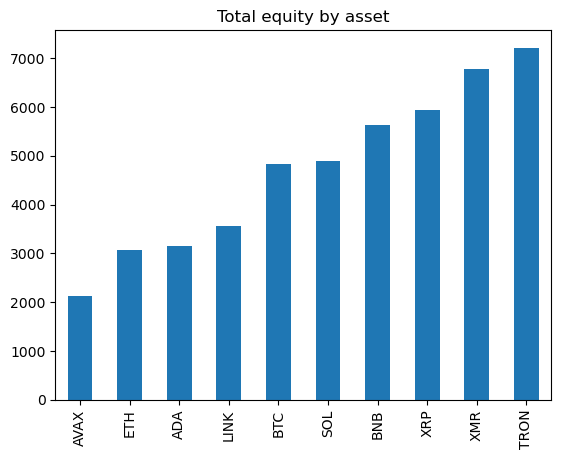

In [10]:
results['Total_equity'].sort_values().plot(kind='bar', title='Total equity by asset');

In [17]:
total_spend = results['Cash_spent'].sum()
total_equity = results['Total_equity'].sum()

profit = total_equity - total_spend
lift = profit / total_spend * 100

print(f"Total spent: ${total_spend:,.0f}")
print(f"Total equity: ${total_equity:,.0f}")
print(f"Lift per year: {lift / 3:.2f}% (total - {lift:.2f}%; profit - {profit:.0f}$)")

Total spent: $29,990
Total equity: $47,190
Lift per year: 19.12% (total - 57.35%; profit - 17200$)


In [12]:
results.index.tolist()

['BTC', 'ETH', 'BNB', 'XRP', 'SOL', 'TRON', 'ADA', 'XMR', 'LINK', 'AVAX']